<a href="https://colab.research.google.com/github/SergeevaAI/Platforms_Data_Sciense/blob/main/Clustering1_Exercise_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%D0%B0_%D0%90%D0%BD%D0%B0%D1%81%D1%82%D0%B0%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

<ipython-input-1-e96e6fb2525a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["species_number"] = penguins["species"].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_number
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


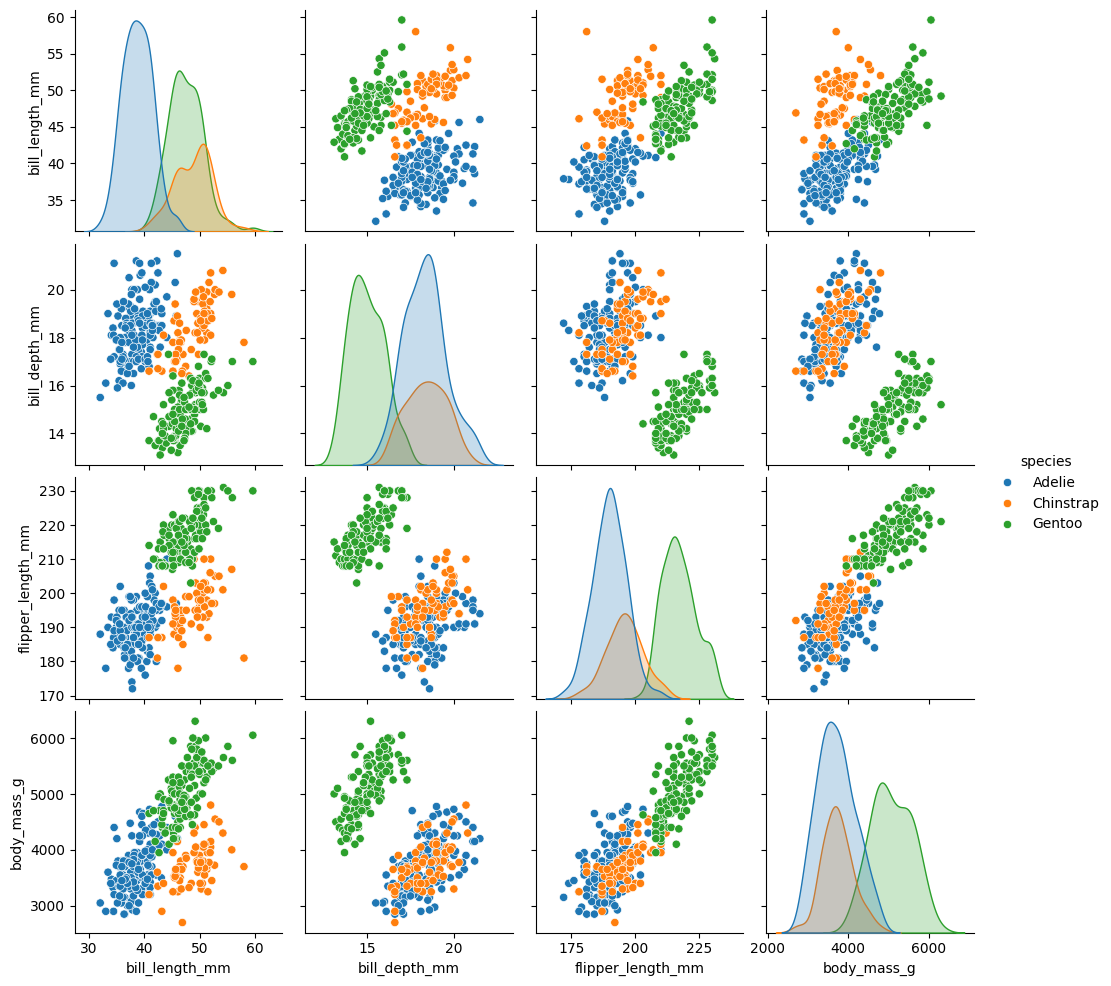

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins["species_number"] = penguins["species"].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
species_p= penguins["species_number"]
penguins.head()

У нас есть набор данных про пингвинов, давайте ознакомимся с данными, посмотрим какие типы у данных.

In [ ]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


Уже по описательной статистике видно, что у нас есть 333 строчки данных, больше всего данных про особей мужского пола, представлено 3 вида пингвинов, больше всего про Adelie, берутся данные с 3 островов, в основном пингвины из Biscoe, максимальная длина клюва достигает 59.6 мм, минимальная 32 мм, максимальная масса тела пингвина 6.300 г, а минимальная 2.700 г. Максимальная глубина клюва 21.5 мм, а минимальная 13 мм.

In [ ]:
# проверяем на наличие нулевых значений

penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Нулевые значения отсутствуют.

In [ ]:
# типы данных

penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
# корреляция

penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


Видно, что чем больше масса тела, например, тем больше длина клюва и плавника, но меньше глубина клюва, при этом слабее всего зависимость между глубиной клюва и длиной клюва, а больше всего зависимость между массой телой и длиной плавника, что логично.

**Задание 1. Примените K-Means к набору данных пингвины.**

Для начала проведём нормализацию, т. к. кластеризация использует вычисление расстояния между точками данных, поэтому нужно привести данные из разных единиц измерения, а менно где-то мм, а где-то граммы, к общему масштабу.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
scale = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
penguins = pd.DataFrame(scale, columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']);
penguins.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889


Для начала построим нашу диаграмму для длины и глубины клюва.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

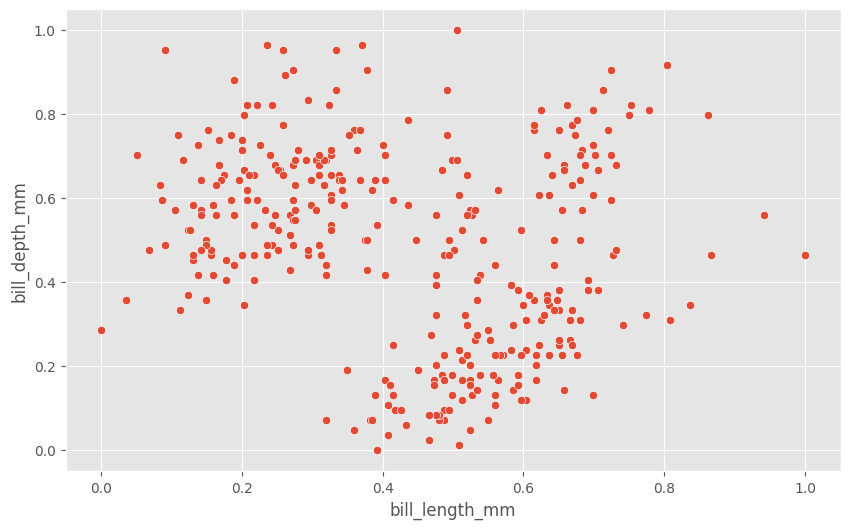

In [ ]:
# Строим график
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

Изберём только нужные столбцы.

In [ ]:
penguins1=penguins[['bill_length_mm', 'bill_depth_mm']]

Задаём для начала 3 кластера, как минимальное, что вполне логично, у нас 3 острова пребывания и 3 вида пингвинов, следовательно, у каждого вида свой набор характеристик. Сейчас нашу теорию проверим. И построим для длины и глубины клюва график.

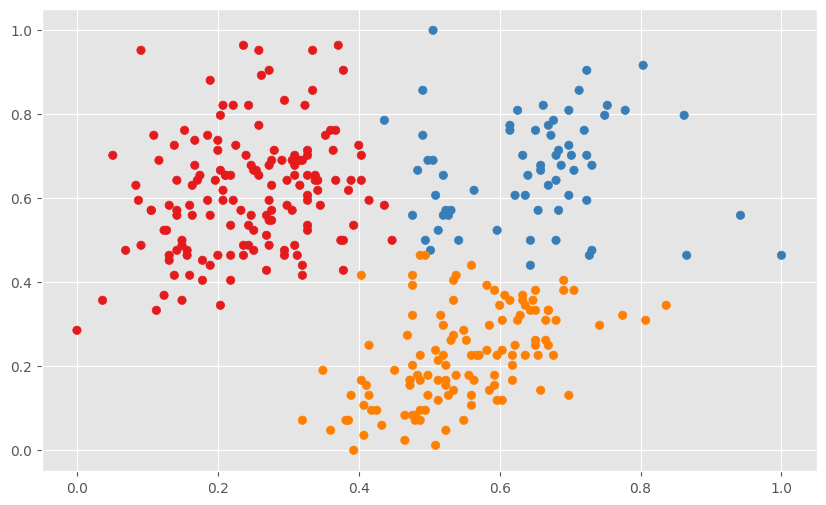

In [ ]:
# Импортируем библиотеки

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Создаем цветовую карту

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

y_pred = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5).fit_predict(penguins1)
plt.scatter(penguins1['bill_length_mm'], penguins1['bill_depth_mm'], c=y_pred,  marker="o", cmap=cmap)

В целом картина схожа, но обратимся к методу локтя для определения нужного количества кластеров и опробуем другие количества кластеров.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

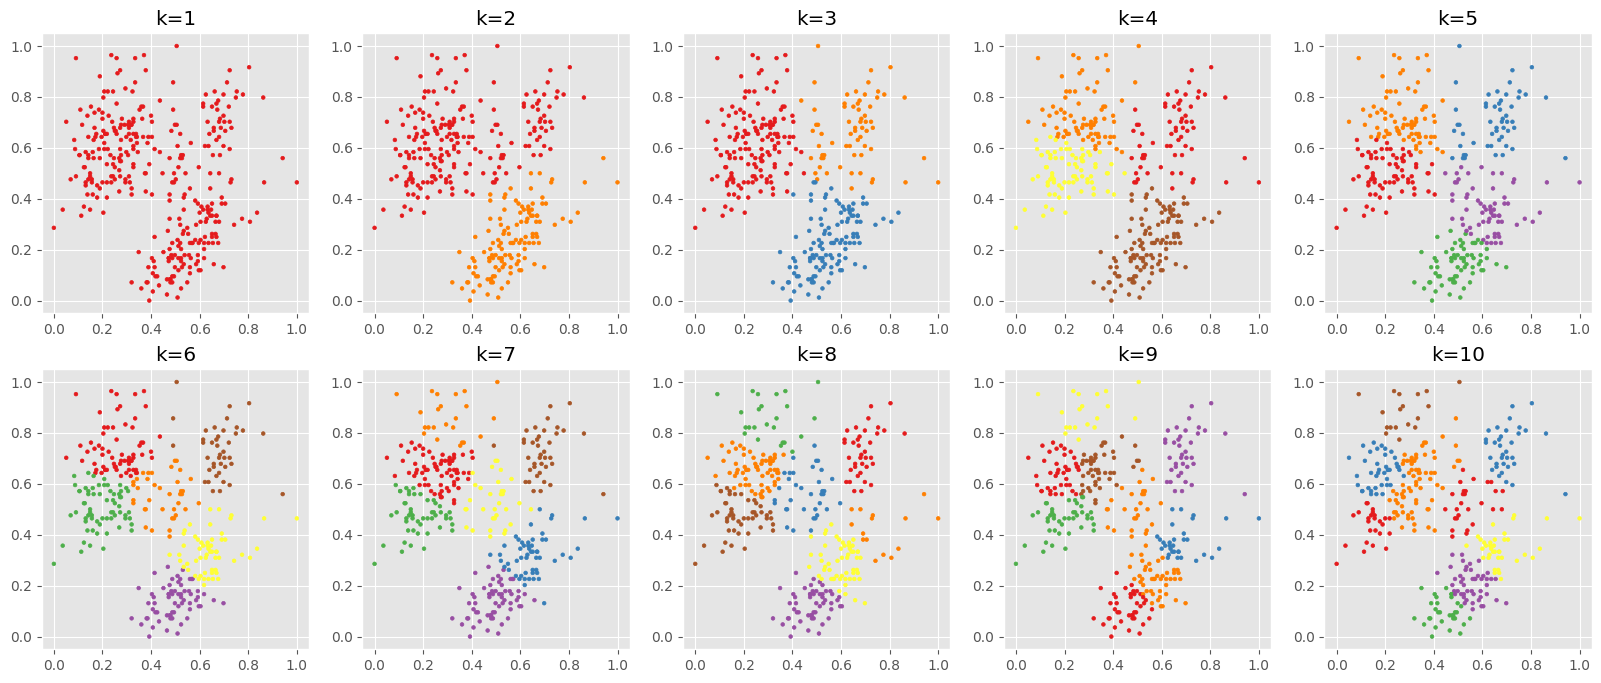

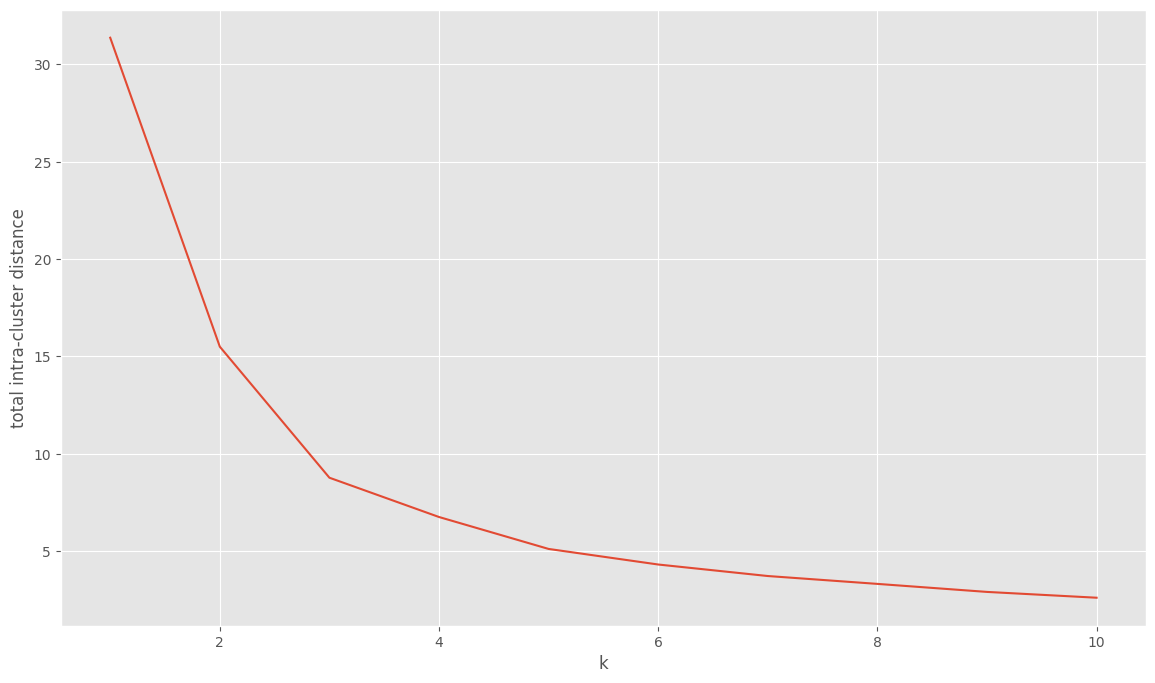

In [ ]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(penguins1)
    scores.append(-model.score(penguins1))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(penguins1['bill_length_mm'], penguins1['bill_depth_mm'], c=y_pred,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))


fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

А теперь обратимся к методу силуета, метод локтя подтвердил, что кластеров стоит брать 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.47583423849247247, 0.5139272799995429, 0.4473698391582202]


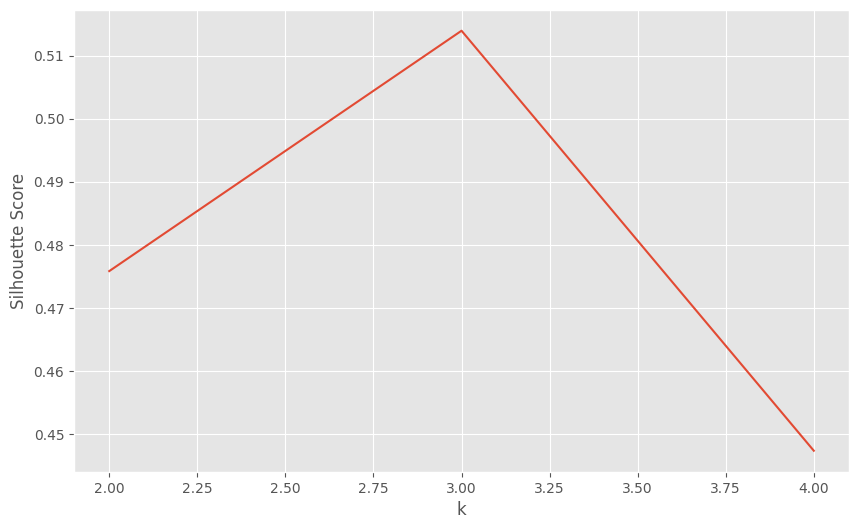

In [ ]:
# код, который просто вычисляет и отображает оценки силуэта.

range_n_clusters = [2, 3, 4]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins1)
    silhouette_avg.append(silhouette_score(penguins1, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Надо выбирать максимальный коэффициент силуета, потому что нужны кластеры, которые достаточно далеко стоят друг от друга, поэтому мы берём 3, все верно, ведь у нас 3 вида пингвинов.

Далее смотрим по длине крыльев и массе тела, берем 3 кластера.

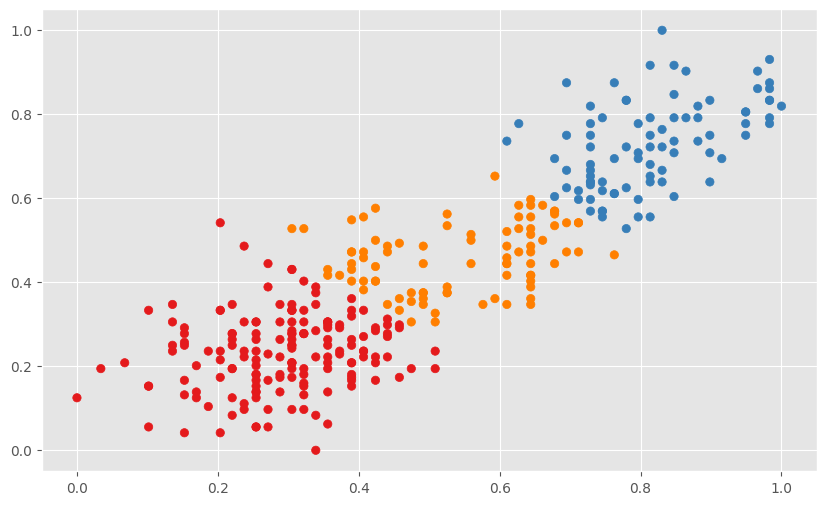

In [ ]:
# выбираем нужные столбцы
penguins2=penguins[['flipper_length_mm', 'body_mass_g']]

# задаем 3 кластера
y_pred2 = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5).fit_predict(penguins2)
plt.scatter(penguins2['flipper_length_mm'], penguins2['body_mass_g'], c=y_pred2,  marker="o", cmap=cmap)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.6147715874125105, 0.47520831615352704, 0.41139981234465034]


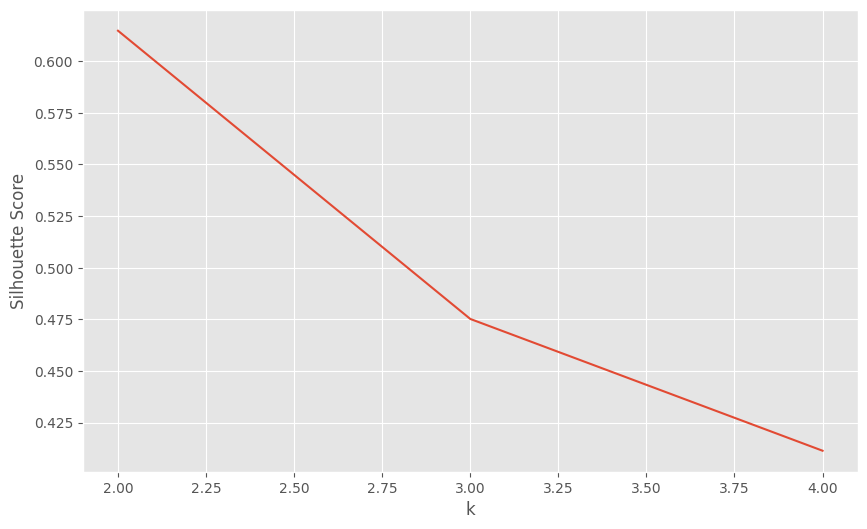

In [ ]:
# код, который вычисляет и отображает оценки силуэта.

range_n_clusters = [2, 3, 4]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins2)
    silhouette_avg.append(silhouette_score(penguins2, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

По оценке силуэта видно, что лучше делить на 2 категории, т. к. у 3 кластеров расстояние меньше между точками. Получается, что можно выделить только 2 группы сильно отличающейся по длине крыльев и массе тела, у 3 уже различия не так явны.

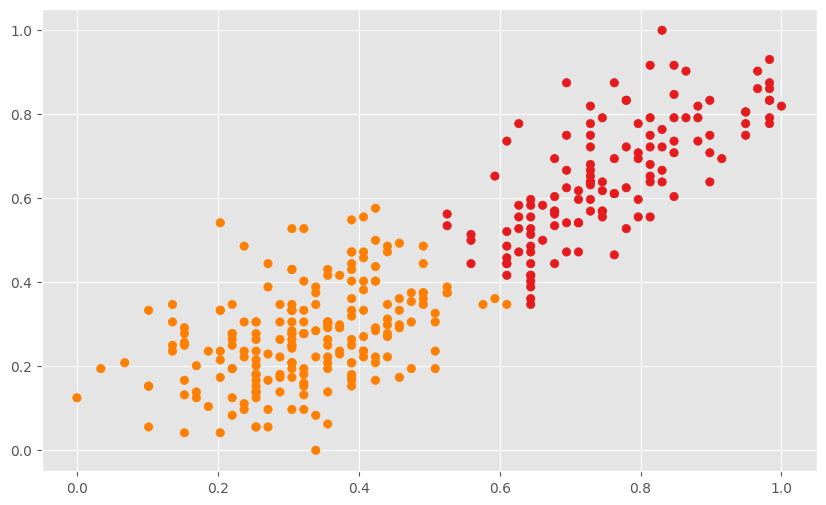

In [ ]:
# задаем 2 кластера
y_pred2_1 = KMeans(n_clusters=2, n_init=10, init='random', max_iter=5).fit_predict(penguins2)
plt.scatter(penguins2['flipper_length_mm'], penguins2['body_mass_g'], c=y_pred2_1,  marker="o", cmap=cmap)

А теперь включим в качестве признаков длину клюва и длину крыла.

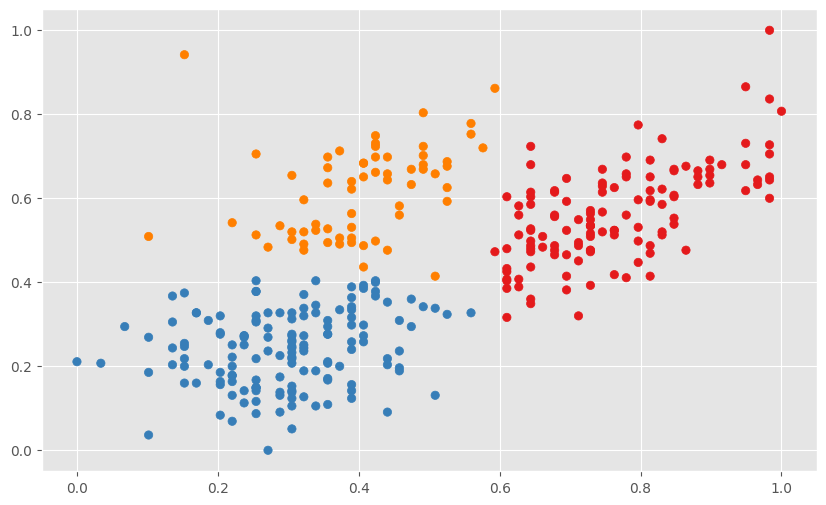

In [ ]:
# выбираем нужные столбцы
penguins3=penguins[['flipper_length_mm', 'bill_length_mm']]

# задаем 3 кластера
y_pred3 = KMeans(n_clusters=3, n_init=100).fit_predict(penguins3)
plt.scatter(penguins3['flipper_length_mm'], penguins3['bill_length_mm'], c=y_pred3,  marker="o", cmap=cmap)

Проверим, что 3 кластера подходят.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.543311576928325, 0.5188528351442627, 0.4969499109472807]


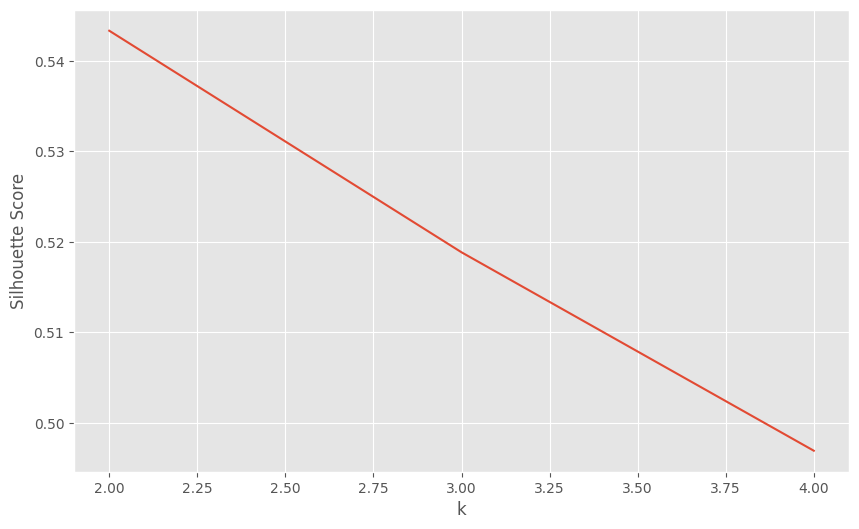

In [ ]:
# код, который вычисляет и отображает оценки силуэта.

range_n_clusters = [2, 3, 4]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins3)
    silhouette_avg.append(silhouette_score(penguins3, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Также советуется брать 2 кластера.

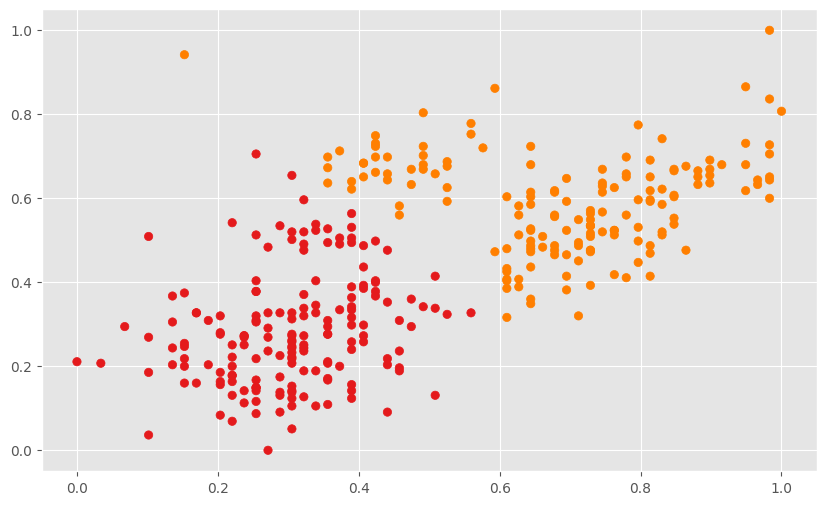

In [ ]:
y_pred3_1 = KMeans(n_clusters=2, n_init=100).fit_predict(penguins3)
plt.scatter(penguins3['flipper_length_mm'], penguins3['bill_length_mm'], c=y_pred3_1,  marker="o", cmap=cmap)

Длина крыла и глубина клюва.

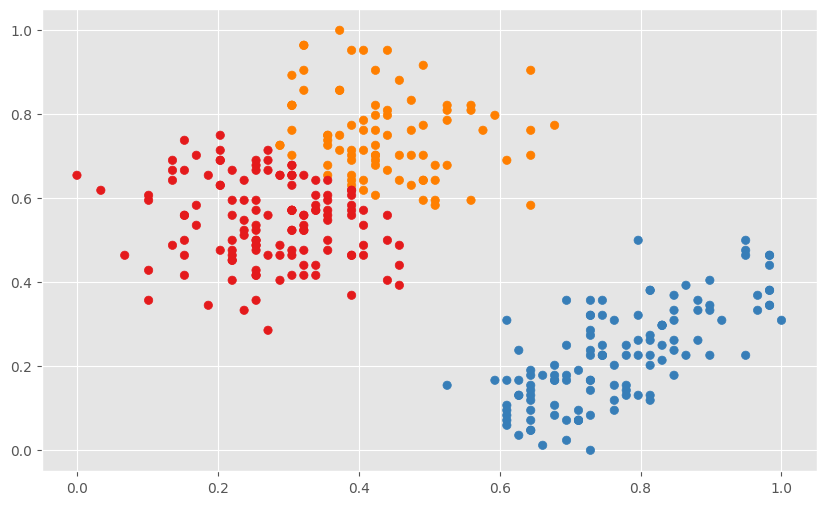

In [ ]:
# выбираем нужные столбцы
penguins4=penguins[['flipper_length_mm', 'bill_depth_mm']]

# задаем 3 кластера
y_pred4 = KMeans(n_clusters=3, n_init=100).fit_predict(penguins4)
plt.scatter(penguins4['flipper_length_mm'], penguins4['bill_depth_mm'], c=y_pred4,  marker="o", cmap=cmap)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.6415042808312936, 0.5009265782862337, 0.4360342287990005]


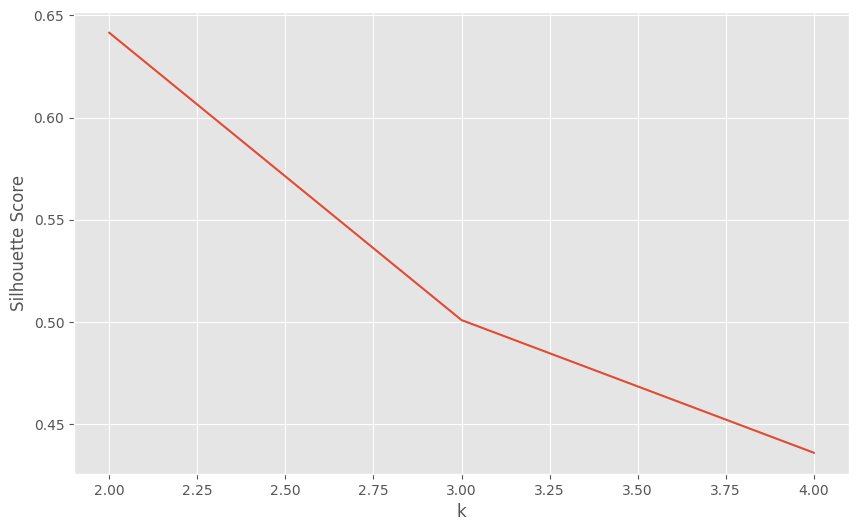

In [ ]:
# код, который вычисляет и отображает оценки силуэта.

range_n_clusters = [2, 3, 4]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins4)
    silhouette_avg.append(silhouette_score(penguins4, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

И визуально, и силуэтом видно, что больше подходят 2 кластера.

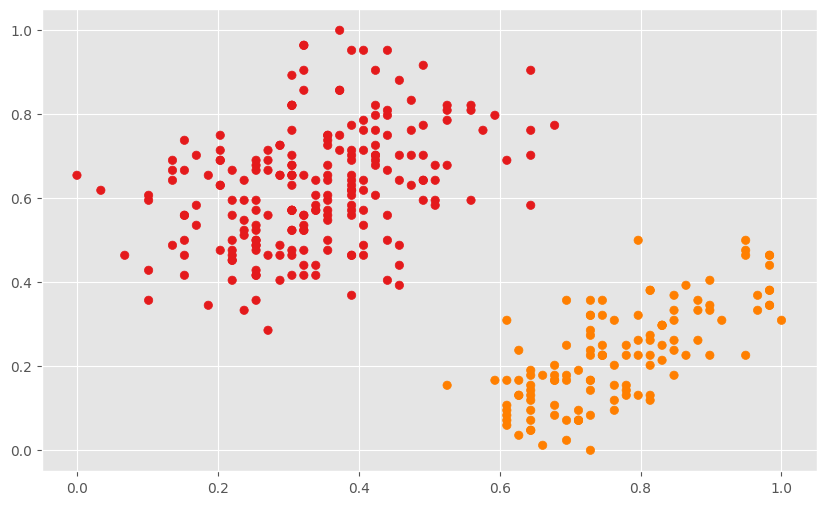

In [ ]:
y_pred4_1 = KMeans(n_clusters=2, n_init=100).fit_predict(penguins4)
plt.scatter(penguins4['flipper_length_mm'], penguins4['bill_depth_mm'], c=y_pred4_1,  marker="o", cmap=cmap)

Масса тела и длина клюва.

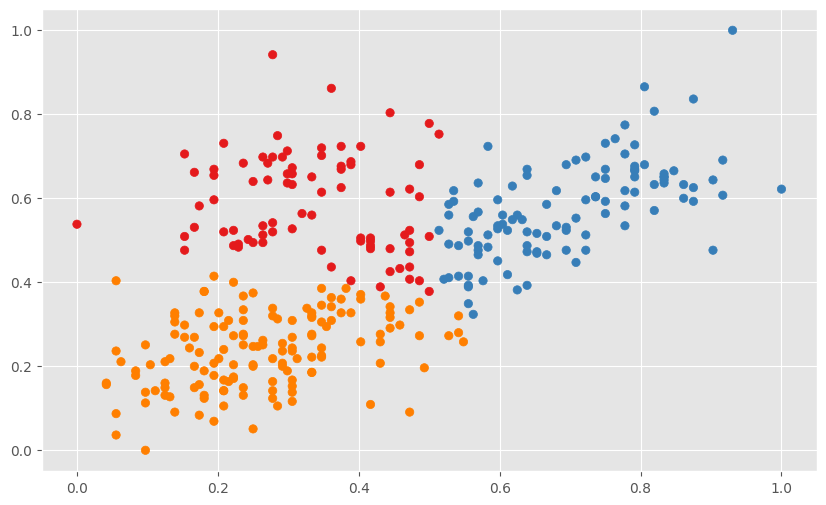

In [ ]:
# выбираем нужные столбцы
penguins5=penguins[['body_mass_g', 'bill_length_mm']]

# задаем 3 кластера
y_pred5 = KMeans(n_clusters=3, n_init=100).fit_predict(penguins5)
plt.scatter(penguins5['body_mass_g'], penguins5['bill_length_mm'], c=y_pred5,  marker="o", cmap=cmap)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.4718807697256754, 0.46619228970623183, 0.4743056039547414, 0.43176884975984575, 0.4159006796185379]


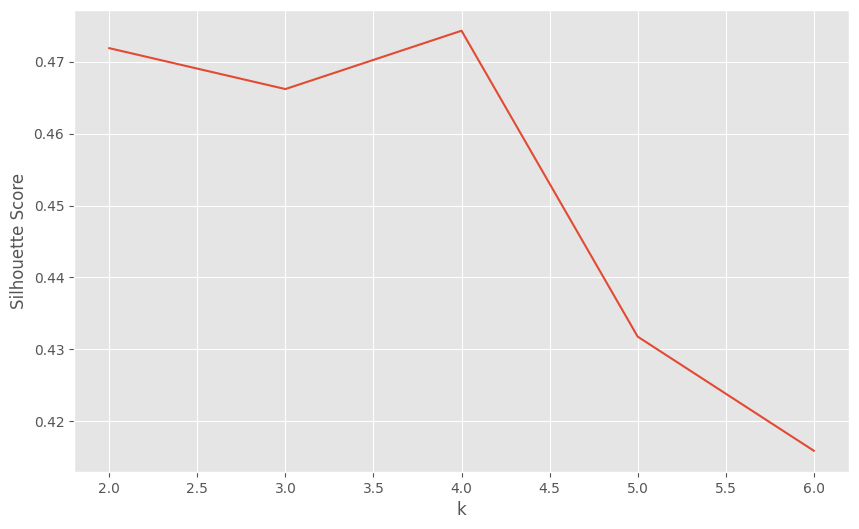

In [ ]:
# код, который вычисляет и отображает оценки силуэта.

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins5)
    silhouette_avg.append(silhouette_score(penguins5, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Разница в расстояниях у кластеров 2, 3, 4 незначительная, но лучше всех 4.

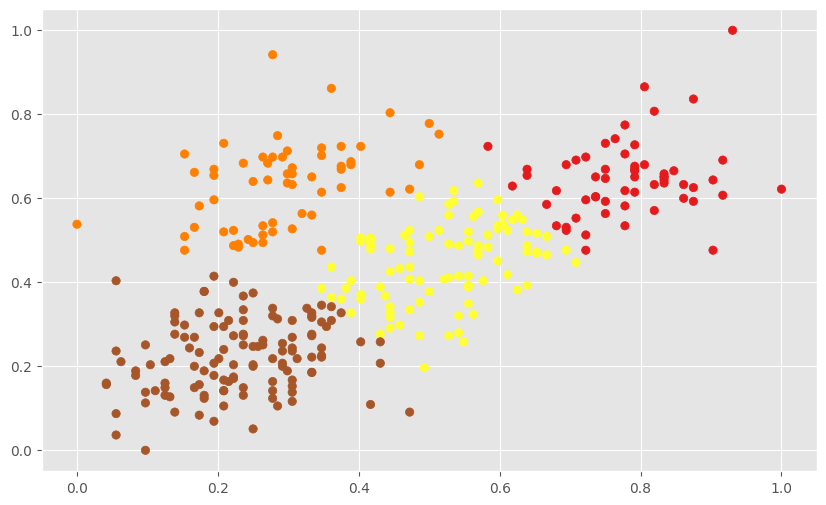

In [ ]:
y_pred5_1 = KMeans(n_clusters=4, n_init=100).fit_predict(penguins5)
plt.scatter(penguins5['body_mass_g'], penguins5['bill_length_mm'], c=y_pred5_1,  marker="o", cmap=cmap)

Масса тела и глубина клюва.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


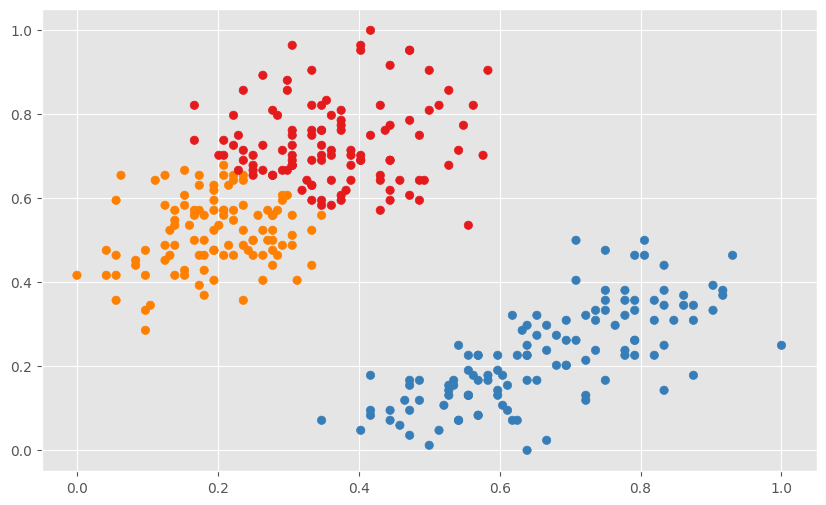

In [ ]:
# выбираем нужные столбцы
penguins6=penguins[['body_mass_g', 'bill_depth_mm']]

# задаем 3 кластера
y_pred6 = KMeans(n_clusters=3, max_iter=10).fit_predict(penguins6)
plt.scatter(penguins6['body_mass_g'], penguins6['bill_depth_mm'], c=y_pred6,  marker="o", cmap=cmap)

Тут явнее выделяются 2 кластера, посмотрим, что покажет метод силуэта.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.61922981403051, 0.49721664284883427, 0.46737149820800267, 0.4023409463465593, 0.40427877000453244]


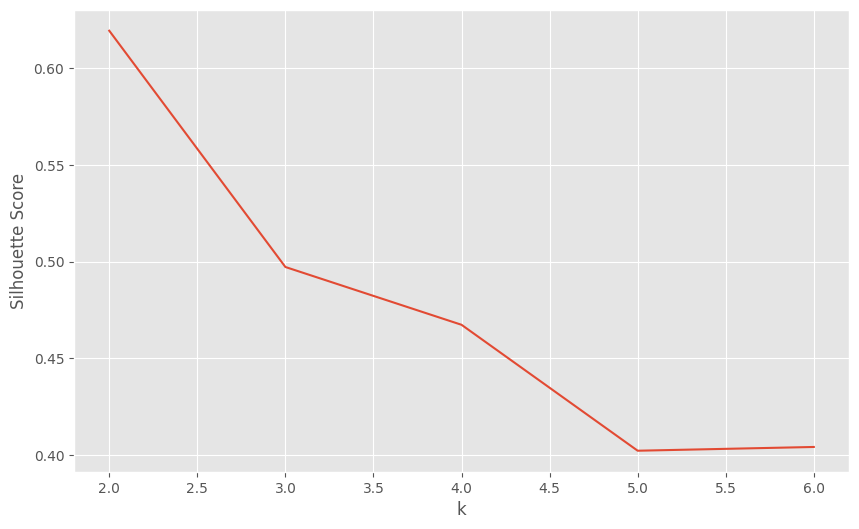

In [ ]:
# код, который вычисляет и отображает оценки силуэта.

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(penguins6)
    silhouette_avg.append(silhouette_score(penguins6, cluster_labels))

print(silhouette_avg)
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Он тоже показывает на 2 кластера.

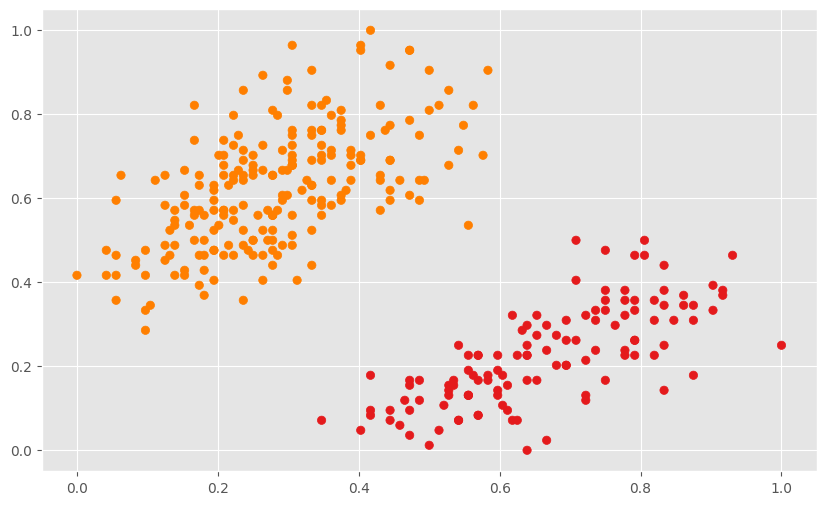

In [ ]:
y_pred6_1 = KMeans(n_clusters=2, n_init=100).fit_predict(penguins6)
plt.scatter(penguins6['body_mass_g'], penguins6['bill_depth_mm'], c=y_pred6_1,  marker="o", cmap=cmap)

**Задание 2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?**

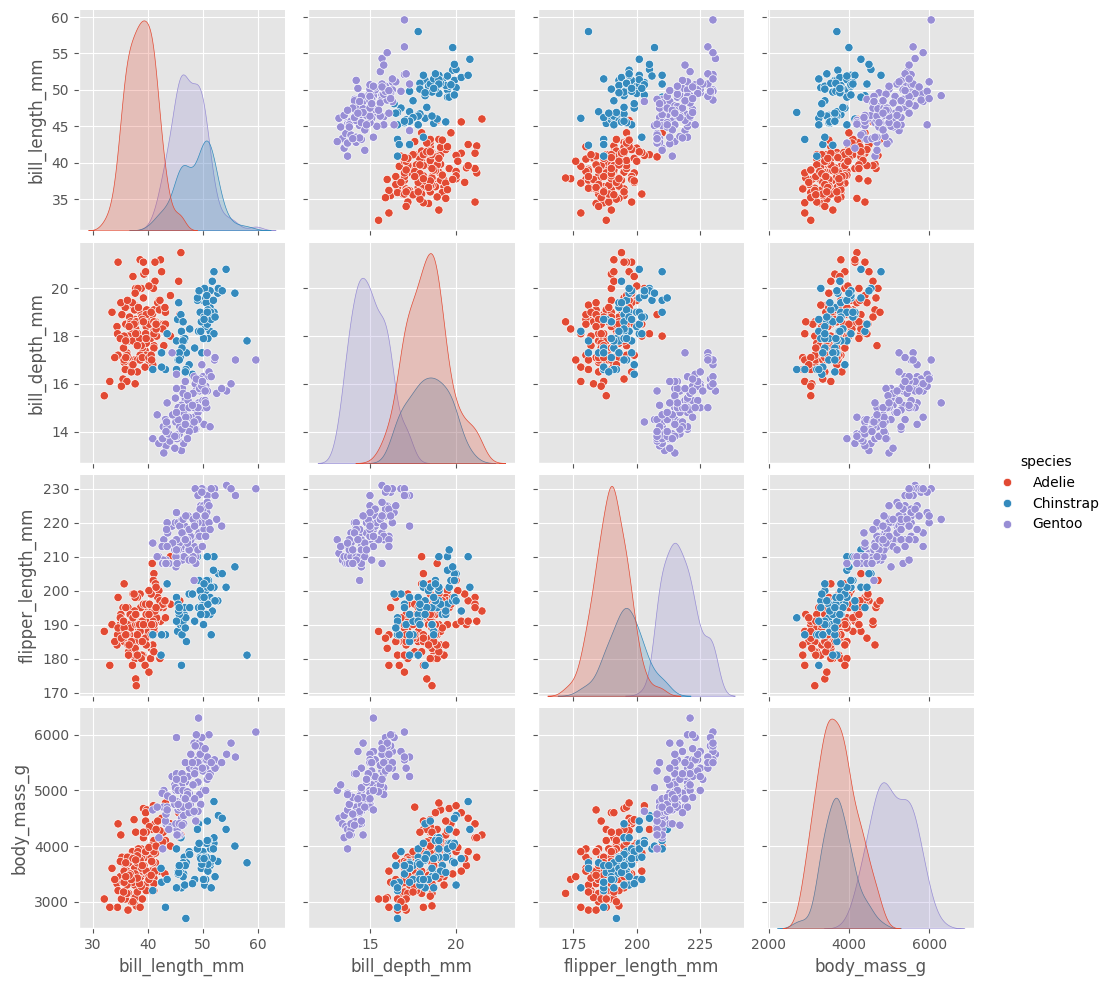

In [ ]:
penguinss = sns.load_dataset("penguins")

penguinss = penguinss.dropna()
sns.pairplot(data=penguinss, hue="species")

Вернемся к нашему изначальному датасету. Длина клюва и глубина клюва или, например, глубина клюва и длина крыльев. У данных признаков по виду в кластеризации идут различия, т. к. значения схожи и нельзя явно выделить кластеры. В кластерах, которые легко выявить, все выявлено верно.

**Задание 3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?**

Будем брать 3 кластера, т. к. у нас 3 вида, хоть в некоторых случаях и лучбе было брать 2 или 4 кластера

In [ ]:
# для длины и глубины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred))

# для длины крыльев и массы тела
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred2))

# для длины клюва и длины крыла
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred3))

# для длины крыла и глубины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred4))

# для массы тела и длины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred5))

# для массы тела и глубины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred6))


(0.7382437322810192, 0.74284399432699, 0.7405367190915074)
(0.4588330170852256, 0.4601664213202936, 0.4594987518643806)
(0.8015162094538312, 0.8067148610150072, 0.8041071328417063)
(0.6274895783139649, 0.6108373091244701, 0.6190514789092904)
(0.6519595296968848, 0.6405456720857047, 0.6462022041325858)
(0.6188064691296475, 0.594307361453719, 0.6063095327865197)


1. Оценки однородности, полноты и v-меры составляют примерно 74%. Это нормально, но не является хорошим.

2. Все показатели на уровне 46%, что не есть хорошо и не является нормой.

3. Высокие значения метрик, на уровне 80%, практически все точки были соотнесены к своим кластерам.

4. Около 62%, нормально.

5. Около 65%, нормально.

6. Около 60%, нормально.

А теперь попробуем вязть другое количество кластеров, как рекомендуется, первый показатель будет нести низкие значения.

In [ ]:
# для длины и глубины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred))

# для длины крыльев и массы тела
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred2_1))

# для длины клюва и длины крыла
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred3_1))

# для длины крыла и глубины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred4_1))

# для массы тела и длины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred5_1))

# для массы тела и глубины клюва
print(metrics.homogeneity_completeness_v_measure(species_p,y_pred6_1))

(0.7382437322810192, 0.74284399432699, 0.7405367190915074)
(0.5057022478796961, 0.7998395810108218, 0.6196364836568502)
(0.49478332507309586, 0.7529399633063765, 0.5971550616948039)
(0.6186947467131836, 0.9999999999999993, 0.7644365906165629)
(0.7361109340314212, 0.5799700022376398, 0.6487781234300533)
(0.6186947467131836, 0.9999999999999993, 0.7644365906165629)


6, 4, 2 показали более хорошие показатели и сделали кластеризацию лучше. Отсюда можно сделать вывод, что для массы тела и глубины клюва стоит брать 2 кластера, для длины крыла и глубины клюва 2 кластера, для длины крыльев и массы тела 2 кластера. Число кластеров не будет соответствовать изначальному, но при этом в этих случаях больше точек попадет в нужные кластеры.